In [27]:
import numpy as np
import koreanize_matplotlib

np.poly1d([2, -1])**2 + np.poly1d([3, -5])**2 + np.poly1d([5, -6])**2 

poly1d([ 38, -94,  62])

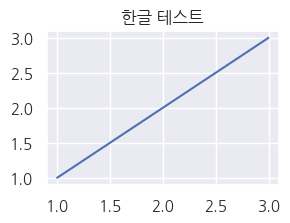

In [28]:
# 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 설정
plt.rcParams['font.family'] = ['NanumGothic', 'DejaVu Sans']

# 음수 부호 깨짐 방지
plt.rc('axes', unicode_minus=False)

# 테스트
plt.figure(figsize=(3,2))
plt.title('한글 테스트')
plt.plot([1,2,3], [1,2,3])
plt.show()

In [29]:
# !pip install sympy

In [30]:
import sympy as sym

th = sym.Symbol('th')
diff_th = sym.diff(38*th**2 - 94*th + 62, th)
diff_th

76*th - 94

### Boston 집값 예측

In [31]:
from pandas import read_csv

column_names = ["crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat","medv"]
boston_pd = read_csv('../data/housing.csv', 
                 names=column_names,  # 컬럼명 지정
                 delimiter=',',       # 콤마로 구분
                 skiprows=1)         # 헤더 행 건너뛰기
boston_pd.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [32]:
# 필요한 패키지 설치
#!pip install plotly
#!pip install --upgrade pip
#!pip install nbformat>=4.2.0

In [33]:
import plotly.express as px

fig = px.histogram(boston_pd, x='medv')
fig.show()

<Axes: >

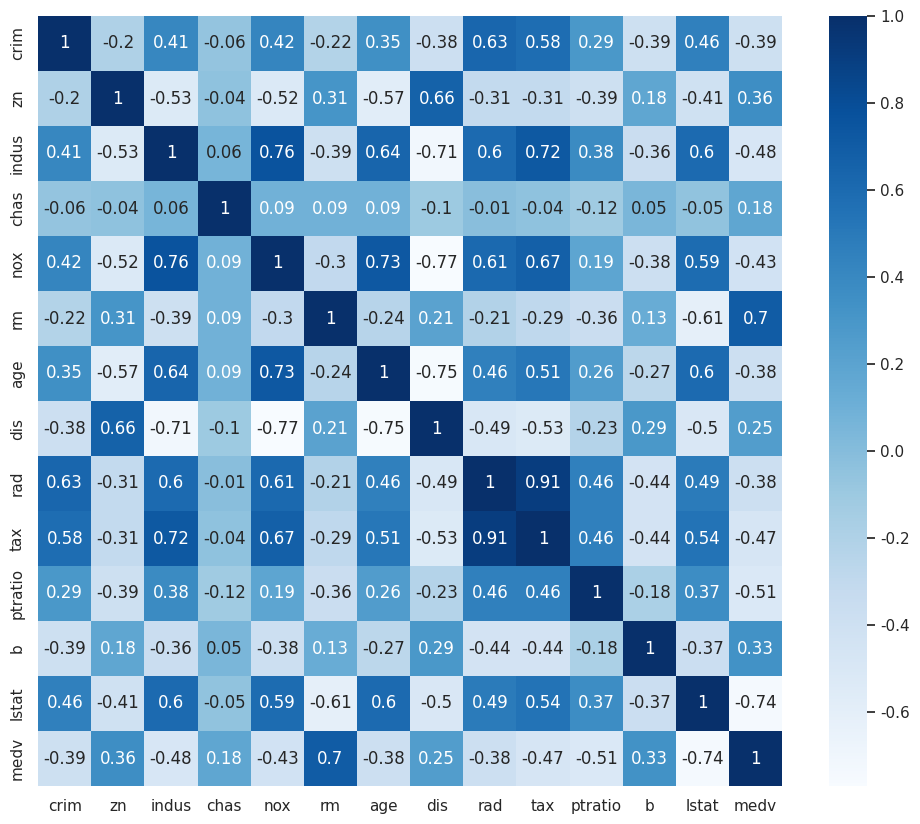

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

corr_mat = boston_pd.corr().round(2)
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(data=corr_mat, annot=True, cmap='Blues')

rm : 방의수

lstat : 저소득측 인구

medv : 집 값

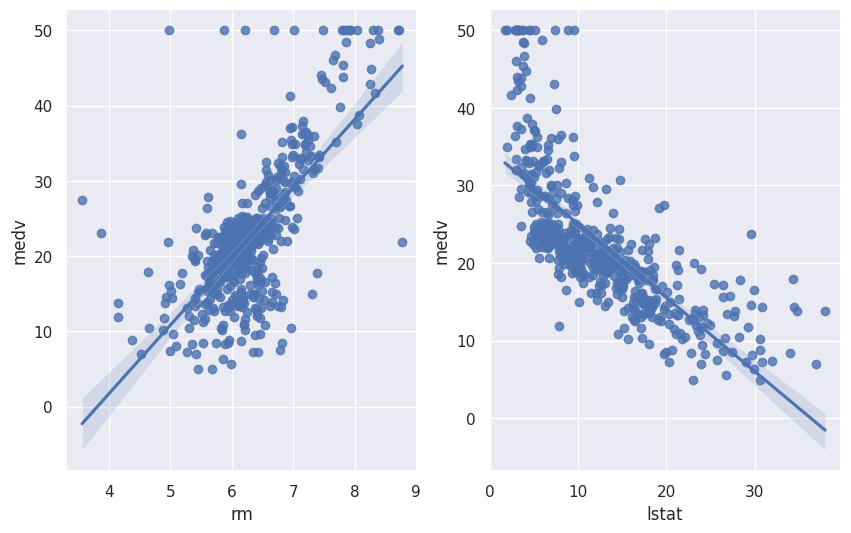

In [35]:
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(10,6)})
fig, ax = plt.subplots(ncols=2)
sns.regplot(x='rm', y='medv', data=boston_pd, ax=ax[0])
sns.regplot(x='lstat', y='medv', data=boston_pd, ax=ax[1])
plt.show()

In [36]:
from sklearn.model_selection import train_test_split

X = boston_pd.drop('medv', axis=1)
y = boston_pd['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [40]:
import numpy as np 
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.font_manager as fm

# 폰트 설정
plt.rcParams['font.family'] = ['NanumGothic', 'DejaVu Sans']

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)
rmse_tr = np.sqrt(mean_squared_error(y_train, pred_tr))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))

print("훈련 세트 RMSE: {:.2f}".format(rmse_tr))
print("테스트 세트 RMSE: {:.2f}".format(rmse_test))

훈련 세트 RMSE: 4.65
테스트 세트 RMSE: 4.93


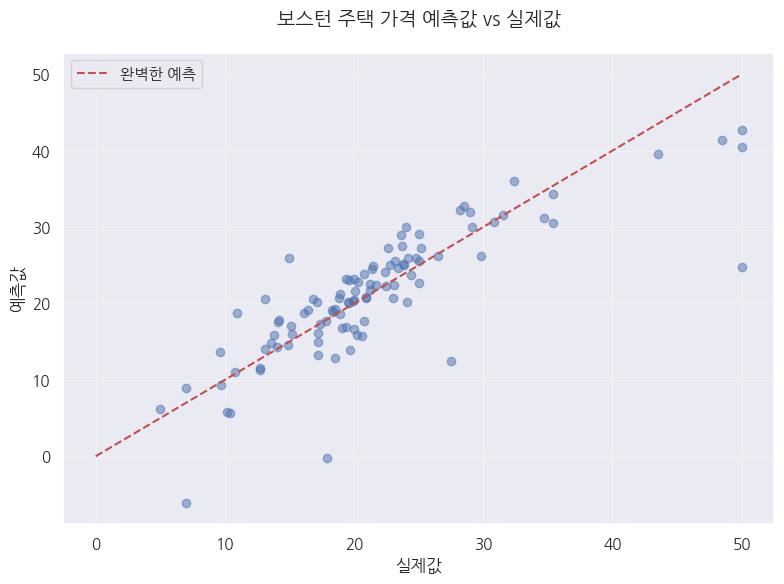

In [41]:
# 산점도 그리기
plt.figure(figsize=(8,6))
plt.scatter(y_test, pred_test, alpha=0.5)
plt.xlabel("실제값", fontsize=12)
plt.ylabel("예측값", fontsize=12)
plt.title("보스턴 주택 가격 예측값 vs 실제값", fontsize=14, pad=20)
plt.plot([0, 50], [0, 50], '--r', label='완벽한 예측')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()